# Speeded-Up Robust Features 

> Speeded-Up Robust Features (SURF) is an enhanced version of SIFT. It works much faster and is more robust to image transformations. In SIFT, the scale space is approximated using Laplacian of Gaussian. 
* Laplacian is a kernel used for calculating the edges in an image. The Laplacian kernel works by approximating a second derivative of the image. Hence, it is very sensitive to noise. We generally apply the Gaussian kernel to the image before Laplacian kernel thus giving it the name Laplacian of Gaussian.

> In SURF, the Laplacian of Gaussian is calculated using a box filter (kernel). The convolution with box filter can be done in parallel for different scales which is the underlying reason for the enhanced speed of SURF (compared to SIFT). There are other neat improvements like this in SURF.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image preprocessing

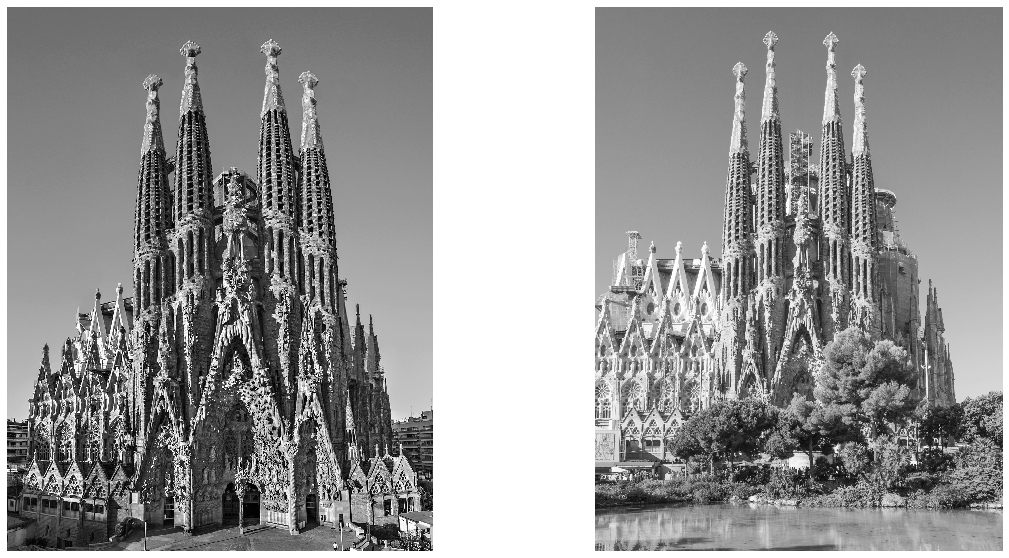

In [3]:
img1 = cv2.imread("Data/Sagrada_Família_1.jpg")
img2 = cv2.imread("Data/Sagrada_Família_2.jpg")

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(19, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.axis('off')

plt.show()

# SURF algorithm

In [4]:
surf  = cv2.xfeatures2d.SURF_create(400)

keypoints1, descriptors1 = surf.detectAndCompute(gray1, None)
keypoints2, descriptors2 = surf.detectAndCompute(gray2, None)

FeatMatch = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = FeatMatch.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

# Draw matches

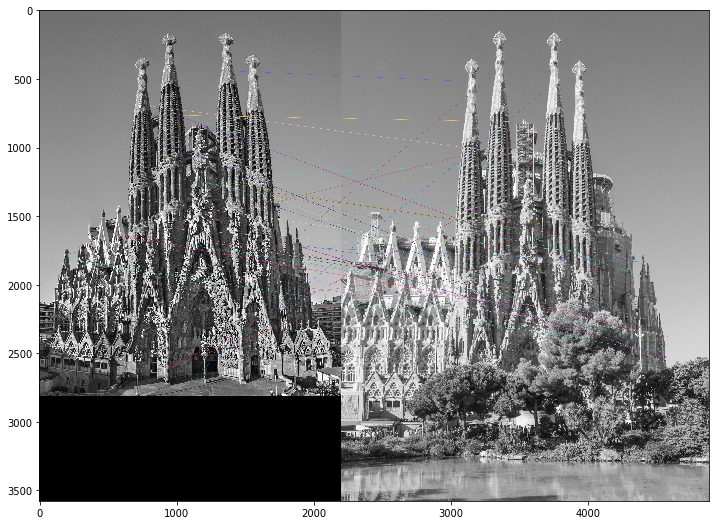

In [5]:
res = cv2.drawMatches(gray1, keypoints1, gray2, keypoints2, matches[:50], 
                      img2, flags=2)

plt.figure(figsize=(12, 12))

plt.imshow(res)
plt.show()